#  USA Population Statistics Project

This project is based on the stats on the USA population depending on the state provided by [FiveThirtyEight]( https://data.fivethirtyeight.com/). The goal is to get insights and trend from the data as well as plot the results for a better understanding. 

Data:

  *  `state` | State name
  *  `median_household_income` | Median household income, 2016
  *  `share_unemployed_seasonal` | Share of the population that is unemployed (seasonally adjusted), Sept. 2016
  *  `share_population_in_metro_areas` | Share of the population that lives in metropolitan areas, 2015
  *  `share_population_with_high_school_degree` | Share of adults 25 and older with a high-school degree, 2009
  *  `share_non_citizen` | Share of the population that are not U.S. citizens, 2015
  *  `share_white_poverty` | Share of white residents who are living in poverty, 2015
  *  `gini_index` | Gini Index, 2015
  *  `share_non_white` | Share of the population that is not white, 2015
  *  `share_voters_voted_trump` | Share of 2016 U.S. presidential voters who voted for Donald Trump
  *  `hate_crimes_per_100k_splc` | Hate crimes per 100,000 population, Southern Poverty Law Center, Nov. 9-18, 2016
  *  `avg_hatecrimes_per_100k_fbi` | Average annual hate crimes per 100,000 population, FBI, 2010-2015

First, we need to import the modules for our analysis.

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we can read our dataset (**"hate_crimes.csv"**), which is a **csv** file.

In [67]:
stats=pd.read_csv("hate_crimes.csv")
stats.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


And we see that we have a lot of columns. For our initial analysis we can choose only those we would like to work on first.

In [68]:
stats_updated = stats[["state","median_household_income", "share_unemployed_seasonal", "share_population_with_high_school_degree","share_voters_voted_trump", "avg_hatecrimes_per_100k_fbi"]]

In [69]:
stats_updated

,state,median_household_income,share_unemployed_seasonal,share_population_with_high_school_degree,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.821,0.63,1.806410
1,Alaska,67629,0.064,0.914,0.53,1.656700
2,Arizona,49254,0.063,0.842,0.50,3.413928
3,Arkansas,44922,0.052,0.824,0.60,0.869209
4,California,60487,0.059,0.806,0.33,2.397986
5,Colorado,60940,0.040,0.893,0.44,2.804689
6,Connecticut,70161,0.052,0.886,0.41,3.772701
7,Delaware,57522,0.049,0.874,0.42,1.469980
8,District of Columbia,68277,0.067,0.871,0.04,10.953480
9,Florida,46140,0.052,0.853,0.49,0.698070


Now we can work on our column names, make them easier to read.

In [70]:
stats_updated = stats_updated.rename(columns={"state":"State", "median_household_income":"Median_Household_Income", "share_unemployed_seasonal":"Share_Unemployed_Seasonal", "share_population_with_high_school_degree":"Share_with_HighSchool_Degree", "share_voters_voted_trump":"Share_for_Trump","avg_hatecrimes_per_100k_fbi":"Avg_Hatecrimes_per100k" })

In [71]:
stats_updated

,State,Median_Household_Income,Share_Unemployed_Seasonal,Share_with_HighSchool_Degree,Share_for_Trump,Avg_Hatecrimes_per100k
0,Alabama,42278,0.060,0.821,0.63,1.806410
1,Alaska,67629,0.064,0.914,0.53,1.656700
2,Arizona,49254,0.063,0.842,0.50,3.413928
3,Arkansas,44922,0.052,0.824,0.60,0.869209
4,California,60487,0.059,0.806,0.33,2.397986
5,Colorado,60940,0.040,0.893,0.44,2.804689
6,Connecticut,70161,0.052,0.886,0.41,3.772701
7,Delaware,57522,0.049,0.874,0.42,1.469980
8,District of Columbia,68277,0.067,0.871,0.04,10.953480
9,Florida,46140,0.052,0.853,0.49,0.698070


It look better now. Let's proceed and see what we can plot in order to orient in our data better.

Text(0.5, 1.0, 'Median Household Income by state')

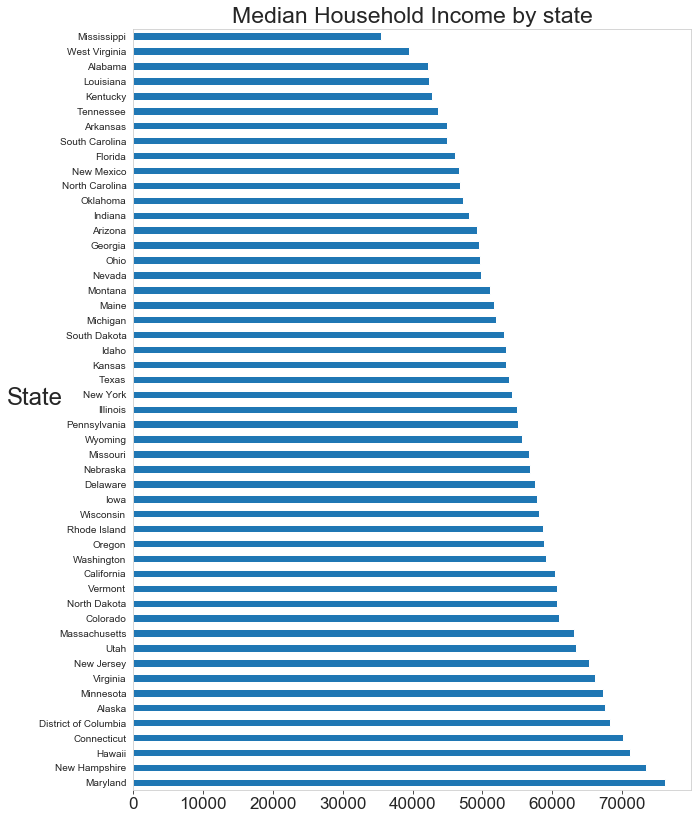

In [72]:
stats_upd_sorted = stats_updated.sort_values(by="Median_Household_Income", ascending = False)
stats_upd_sorted.plot.barh(x= "State",y="Median_Household_Income", figsize =(10,14))
plt.gca().legend_.remove()
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel("State",rotation=0, fontsize=24)
plt.xticks(fontsize=17)
plt.tick_params(bottom = "On")
plt.title("Median Household Income by state",{'fontsize': 23})

Noticable that states such as Mississippi and West Virginia show the lowest median household income values of around 35000 annual. Maryland and New Hampshire on the other hand represent the highest incomes of 70000-75000 annual.

Text(0.5, 1.0, 'Share voted for Trump by State')

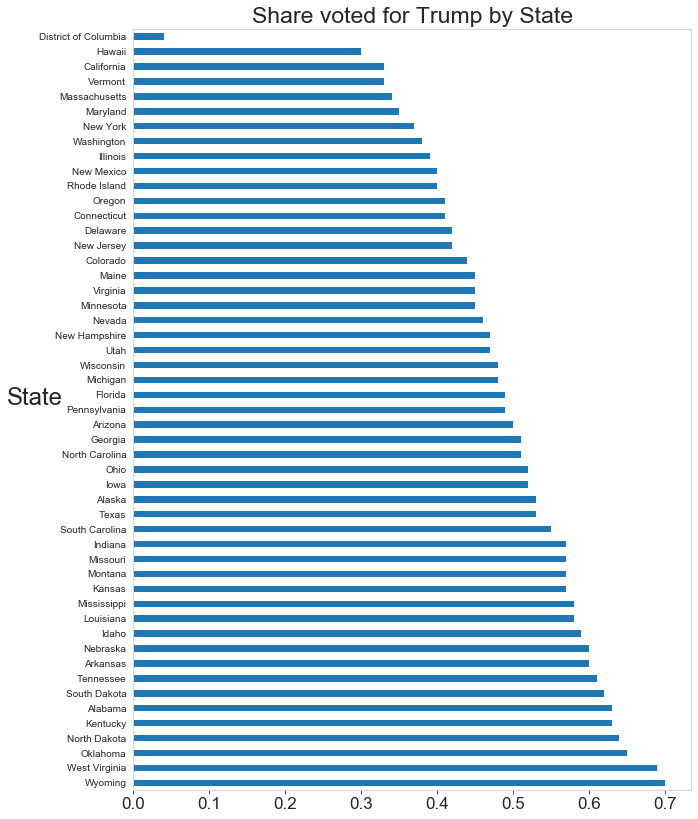

In [73]:
stats_upd_sorted_Trump = stats_updated.sort_values(by="Share_for_Trump", ascending = False)
stats_upd_sorted_Trump.plot.barh(x= "State",y="Share_for_Trump", figsize =(10,14))
plt.gca().legend_.remove()
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel("State",rotation=0, fontsize=24)
plt.xticks(fontsize=17)
plt.tick_params(bottom = "On")
plt.title("Share voted for Trump by State",{'fontsize': 23})

Interesting, we see that states like West Virginia, Alabama and Kentucky for example have more people that voted for Donald Trump even though their median household income values are low. In comparison, District of Columbia, Hawaii, Massachusetts and California show less Trump supporters but the income for these states is high.

We can also analyse the crime rate.

In [74]:
stats_updated_crime_sorted = stats_updated.sort_values(by="Avg_Hatecrimes_per100k")

In [75]:
stats_updated_crime_sorted

,State,Median_Household_Income,Share_Unemployed_Seasonal,Share_with_HighSchool_Degree,Share_for_Trump,Avg_Hatecrimes_per100k
50,Wyoming,55690,0.040,0.918,0.70,0.266941
10,Georgia,49555,0.058,0.839,0.51,0.412012
38,Pennsylvania,55173,0.053,0.879,0.49,0.430928
15,Iowa,57810,0.036,0.914,0.52,0.561396
24,Mississippi,35521,0.061,0.804,0.58,0.622746
9,Florida,46140,0.052,0.853,0.49,0.698070
43,Texas,53875,0.042,0.799,0.53,0.752768
3,Arkansas,44922,0.052,0.824,0.60,0.869209
13,Illinois,54916,0.054,0.864,0.39,1.044016
36,Oklahoma,47199,0.044,0.856,0.65,1.081672


We notice that Hawaii is missing its value. Let's fill it with a mean number for the column.

In [76]:
stats_updated["Avg_Hatecrimes_per100k"] = stats_updated["Avg_Hatecrimes_per100k"].fillna(stats_updated["Avg_Hatecrimes_per100k"].mean())

Now we can try and plot it.

In [77]:
stats_updated_crime_sorted = stats_updated.sort_values(by="Avg_Hatecrimes_per100k")

In [78]:
stats_updated_crime_sorted

,State,Median_Household_Income,Share_Unemployed_Seasonal,Share_with_HighSchool_Degree,Share_for_Trump,Avg_Hatecrimes_per100k
50,Wyoming,55690,0.040,0.918,0.70,0.266941
10,Georgia,49555,0.058,0.839,0.51,0.412012
38,Pennsylvania,55173,0.053,0.879,0.49,0.430928
15,Iowa,57810,0.036,0.914,0.52,0.561396
24,Mississippi,35521,0.061,0.804,0.58,0.622746
9,Florida,46140,0.052,0.853,0.49,0.698070
43,Texas,53875,0.042,0.799,0.53,0.752768
3,Arkansas,44922,0.052,0.824,0.60,0.869209
13,Illinois,54916,0.054,0.864,0.39,1.044016
36,Oklahoma,47199,0.044,0.856,0.65,1.081672


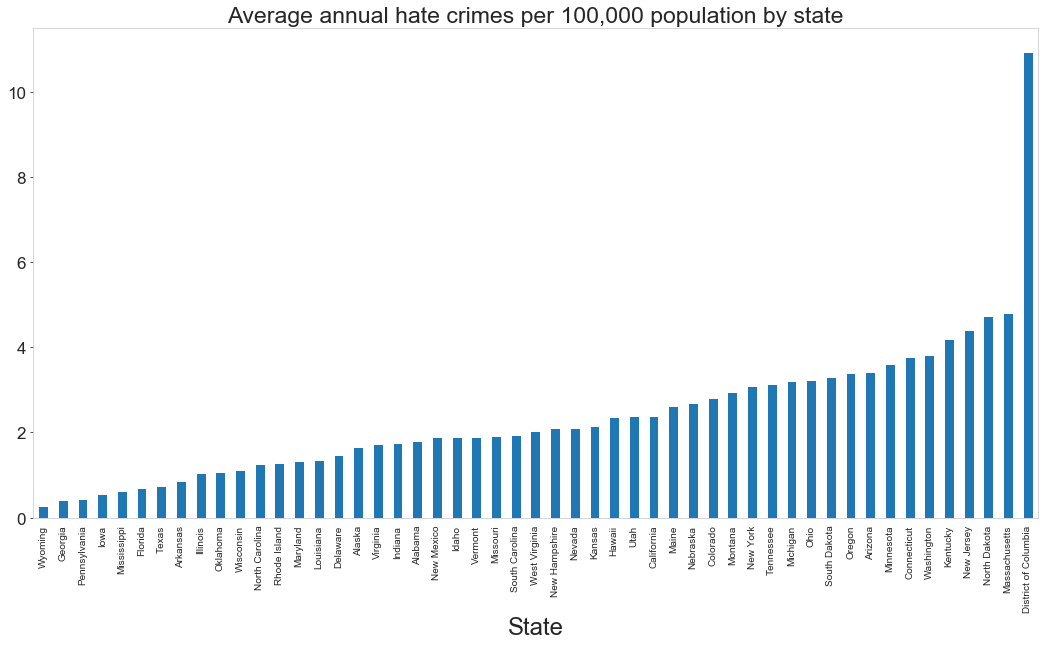

In [79]:
stats_updated_crime_sorted.plot.bar(x= "State",y="Avg_Hatecrimes_per100k", figsize =(18,9))
plt.gca().legend_.remove()
plt.title("Average annual hate crimes per 100,000 population by state",{'fontsize': 23})
plt.xlabel("State",rotation=0, fontsize=24)
plt.yticks(fontsize=17)
plt.tick_params(left = "On")

District of Columbia appears as some sort of outlier here. There is no obvious correlation except that District of Columbia represent the lowest Trump support lavue and the highest average annual crime rate. 

In [80]:
stats_updated_unempl_sorted=stats_updated.sort_values(by="Share_Unemployed_Seasonal")

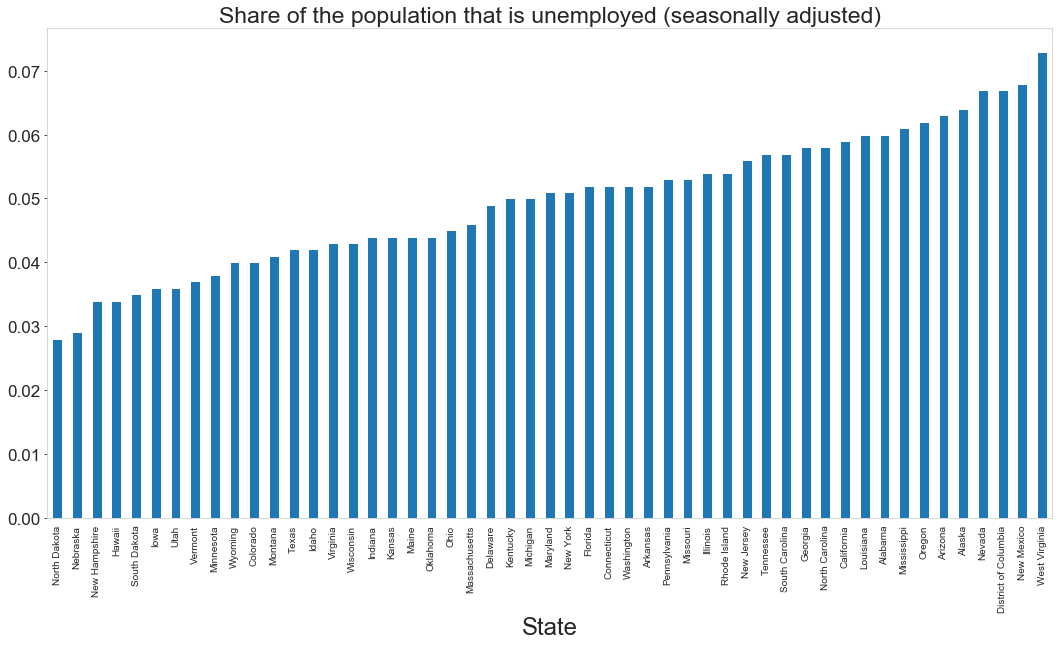

In [81]:
stats_updated_unempl_sorted.plot.bar(x= "State",y="Share_Unemployed_Seasonal", figsize =(18,9))
plt.gca().legend_.remove()
plt.title("Share of the population that is unemployed (seasonally adjusted)",{'fontsize': 23})
plt.xlabel("State",rotation=0, fontsize=24)
plt.yticks(fontsize=17)
plt.tick_params(left = "On")

Here, West Virginia is the highest unemployment rate state and one of the top states that voted for Trump having one of the lowest median incomes per household. However, at the same time we see District of Columbia that shows the opposite trend (minimum Trump supporters and one the highest incomes) so we might not get a direct correlation or connection.

We can investigate the stats on how many people have a highschool degree as well. 

In [82]:
stats_updated_degree_sorted=stats_updated.sort_values(by="Share_with_HighSchool_Degree")
stats_updated_degree_sorted

,State,Median_Household_Income,Share_Unemployed_Seasonal,Share_with_HighSchool_Degree,Share_for_Trump,Avg_Hatecrimes_per100k
43,Texas,53875,0.042,0.799,0.53,0.752768
24,Mississippi,35521,0.061,0.804,0.58,0.622746
4,California,60487,0.059,0.806,0.33,2.397986
17,Kentucky,42786,0.050,0.817,0.63,4.207890
0,Alabama,42278,0.060,0.821,0.63,1.806410
18,Louisiana,42406,0.060,0.822,0.58,1.341170
3,Arkansas,44922,0.052,0.824,0.60,0.869209
31,New Mexico,46686,0.068,0.828,0.40,1.886435
48,West Virginia,39552,0.073,0.828,0.69,2.037054
42,Tennessee,43716,0.057,0.831,0.61,3.136051


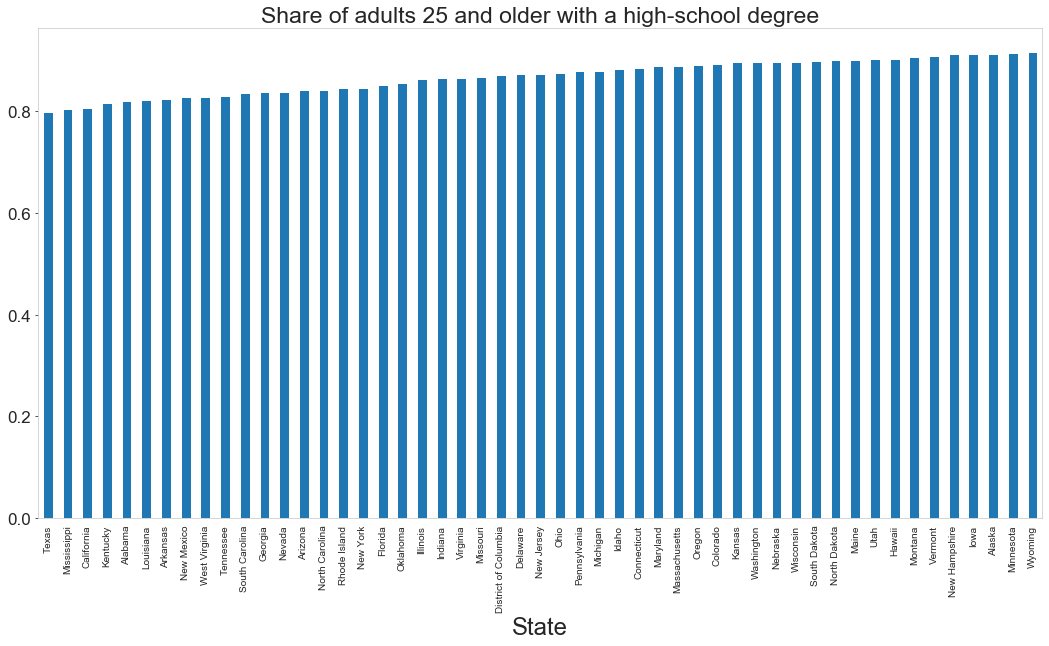

In [83]:
stats_updated_degree_sorted.plot.bar(x= "State",y="Share_with_HighSchool_Degree", figsize =(18,9))
plt.gca().legend_.remove()
plt.title("Share of adults 25 and older with a high-school degree",{'fontsize': 23})
plt.xlabel("State",rotation=0, fontsize=24)
plt.yticks(fontsize=17)
plt.tick_params(left = "On")

Not a big difference here. The vast majority of the US population across the country has a highchool degree.

## Conclusion

This project helped us understand the statistics on the US population and get valuable insights on the overall situation in the country. 